# Final Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats



## Data preprocessing

In [ ]:
# import dataset using pandas

sales_data = pd.read_csv("/content/train 5.csv")
sales_data.head()

test_data = pd.read_csv("/content/test 2.csv")


In [ ]:
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
sales_data.info()
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# check null values for column product category columns (1 and 2)
sales_data.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
# find unique values of occupation column
sales_data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
# find unique value of martial status
sales_data['Marital_Status'].unique()

array([0, 1])

In [ ]:
# find unique value of product category columns (1 and 2) in an ascending order
sorted_value_1 = np.sort(sales_data['Product_Category_1'].unique())

sorted_value_2 = np.sort(sales_data['Product_Category_2'].unique())
sorted_value_2

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., nan])

In [ ]:
sorted_value_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


<ipython-input-325-3c1820dd8734>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Purchase'], color='g', bins=100, hist_kws={'alpha': 0.4});


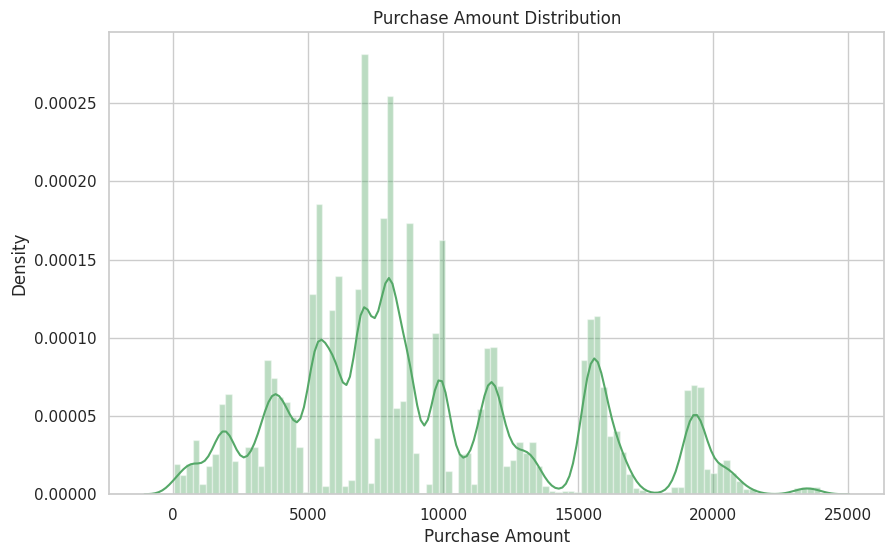

In [ ]:
# get the summary statistics
print(sales_data['Purchase'].describe())

# plot the distribution of purchase amount
plt.figure(figsize=(10, 6))
# sns.kdeplot(sales_data['Purchase'], shade=True)
sns.distplot(sales_data['Purchase'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()



### From the image above of the purchasing amount, we can tell that the range between roughly 6000 - 100000 has the most people which would like to have a purchase in this price range.

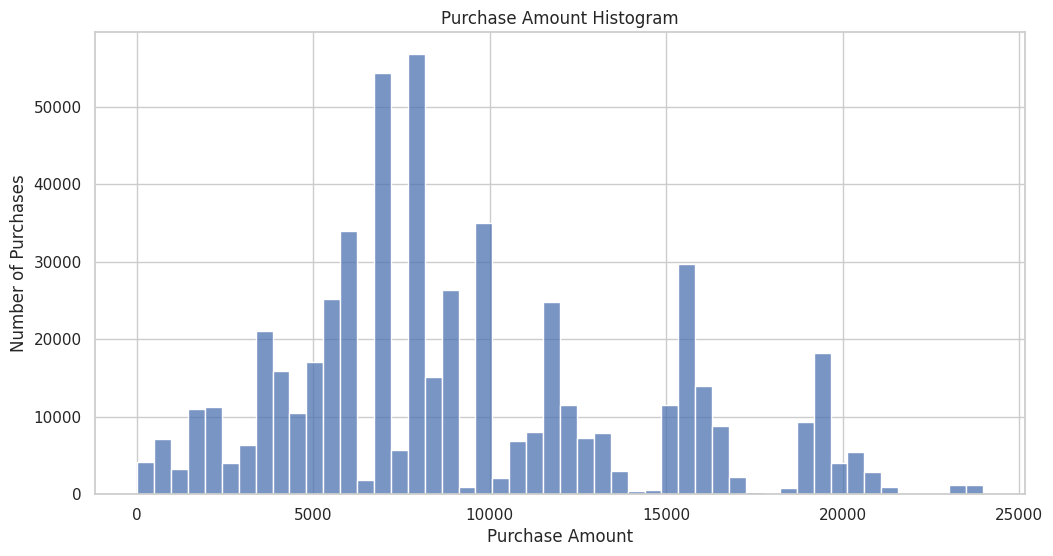

In [ ]:
# plot the histogram of purchase amount
plt.figure(figsize=(12, 6))
sns.histplot(sales_data['Purchase'], bins=50, kde=False)  # 设置bins可以调整直方图的条形数量
plt.title('Purchase Amount Histogram')
plt.xlabel('Purchase Amount')
plt.ylabel('Number of Purchases')
plt.show()


In [ ]:
# 处理缺失值：用0填充Product_Category_2和Product_Category_3的缺失值
# handling NA values: fill NA values with 0 for Product_Category_2 and Product_Category_3
sales_data.dropna(subset=['Gender'], inplace=True)
sales_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)



In [ ]:
sales_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
# 确定要进行独热编码的列
categorical_cols = ['Gender', 'City_Category', 'Stay_In_Current_City_Years', "Age"]

# 在训练集上执行独热编码
train_data_encoded = pd.get_dummies(sales_data, columns=categorical_cols)

# 在测试集上执行独热编码，确保使用与训练集相同的列
test_set_encoded = pd.get_dummies(test_data, columns=categorical_cols)

# 对齐训练集和测试集的列
# 保留训练集中的列，并为测试集中缺少的列添加零列
# test_set_encoded = test_set_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

# 删除训练集中的Purchase列，因为测试集中不应该有这一列
# test_set_encoded.drop(['Purchase'], axis=1, inplace=True)

# 现在 train_data_encoded 和 test_set_encoded 应该有相同的特征列


In [ ]:
train_data_encoded.head()


,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,P00069042,10,0,3,0.0,0.0,8370,1,0,...,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,10,0,12,0.0,0.0,1422,1,0,...,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,10,0,12,14.0,0.0,1057,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,16,0,8,0.0,0.0,7969,0,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
test_set_encoded.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000004,P00128942,7,1,1,11.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1000009,P00113442,17,0,3,5.0,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1000010,P00288442,1,1,5,14.0,0.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1000010,P00145342,1,1,4,9.0,0.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1000011,P00053842,1,0,4,5.0,12.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_set_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        233599 non-null  int64  
 1   Product_ID                     233599 non-null  object 
 2   Occupation                     233599 non-null  int64  
 3   Marital_Status                 233599 non-null  int64  
 4   Product_Category_1             233599 non-null  int64  
 5   Product_Category_2             233599 non-null  float64
 6   Product_Category_3             233599 non-null  float64
 7   Gender_F                       233599 non-null  uint8  
 8   Gender_M                       233599 non-null  uint8  
 9   City_Category_A                233599 non-null  uint8  
 10  City_Category_B                233599 non-null  uint8  
 11  City_Category_C                233599 non-null  uint8  
 12  Stay_In_Current_City_Years_0  

In [ ]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  object 
 2   Occupation                     550068 non-null  int64  
 3   Marital_Status                 550068 non-null  int64  
 4   Product_Category_1             550068 non-null  int64  
 5   Product_Category_2             550068 non-null  float64
 6   Product_Category_3             550068 non-null  float64
 7   Purchase                       550068 non-null  int64  
 8   Gender_F                       550068 non-null  uint8  
 9   Gender_M                       550068 non-null  uint8  
 10  City_Category_A                550068 non-null  uint8  
 11  City_Category_B                550068 non-null  uint8  
 12  City_Category_C               

### Updated datafram, "train_encoded, test_encoded"

In [ ]:
# export this new dataset as csv file, names as train_data.csv
# train_data.to_csv('train_data.csv', index=False)


### （1）EDA analysis: In order to find the relationship between variable "Purchase" and other variables in our dataset, our approach here is to use EDA analysis to understand the relationships between each varaibles.

In [ ]:
# Set the style of the plot

sns.set(style="whitegrid")

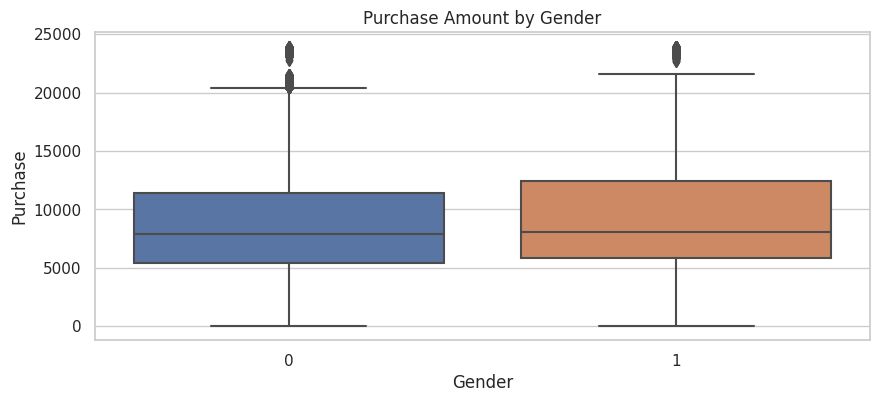

In [ ]:
# Exploratory Data Analysis (EDA)
# analysis the relationship between gender and purchase amount

plt.figure(figsize=(10, 4))
sns.boxplot(x='Gender', y='Purchase', data=train_data)
plt.title('Purchase Amount by Gender')
plt.show()

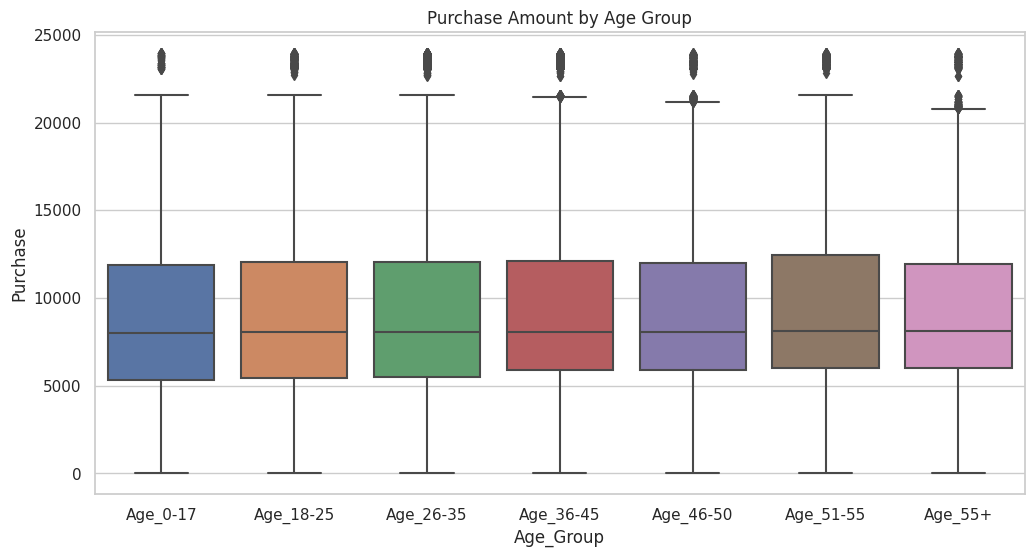

In [ ]:
# analysis the relationship between age and purchase amount

age_columns = [col for col in train_data.columns if 'Age_' in col]
train_data_age = train_data.melt(id_vars='Purchase', value_vars=age_columns, var_name='Age_Group', value_name='Value')
train_data_age = train_data_age[train_data_age['Value'] == 1]  # Filter out the rows where the value is 0

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Purchase', data=train_data_age)
plt.title('Purchase Amount by Age Group')
plt.show()

In [ ]:
# descriptive statistics

descriptive_stats = train_data[['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']].apply(
    lambda x: train_data['Purchase'][x==1].describe()
)

# ANOVA test

anova = stats.f_oneway(
    train_data['Purchase'][train_data['Age_0-17'] == 1],
    train_data['Purchase'][train_data['Age_18-25'] == 1],
    train_data['Purchase'][train_data['Age_26-35'] == 1],
    train_data['Purchase'][train_data['Age_36-45'] == 1],
    train_data['Purchase'][train_data['Age_46-50'] == 1],
    train_data['Purchase'][train_data['Age_51-55'] == 1],
    train_data['Purchase'][train_data['Age_55+'] == 1]
)

# Kruskal-Wallis H-test

kruskal = stats.kruskal(
    train_data['Purchase'][train_data['Age_0-17'] == 1],
    train_data['Purchase'][train_data['Age_18-25'] == 1],
    train_data['Purchase'][train_data['Age_26-35'] == 1],
    train_data['Purchase'][train_data['Age_36-45'] == 1],
    train_data['Purchase'][train_data['Age_46-50'] == 1],
    train_data['Purchase'][train_data['Age_51-55'] == 1],
    train_data['Purchase'][train_data['Age_55+'] == 1]
)

descriptive_stats, anova, kruskal


(           Age_0-17     Age_18-25      Age_26-35      Age_36-45     Age_46-50  \
 count  15102.000000  99660.000000  219587.000000  110013.000000  45701.000000   
 mean    8933.464640   9169.663606    9252.690633    9331.350695   9208.625697   
 std     5111.114046   5034.321997    5010.527303    5022.923879   4967.216367   
 min       12.000000     12.000000      12.000000      12.000000     12.000000   
 25%     5328.000000   5415.000000    5475.000000    5876.000000   5888.000000   
 50%     7986.000000   8027.000000    8030.000000    8061.000000   8036.000000   
 75%    11874.000000  12028.000000   12047.000000   12107.000000  11997.000000   
 max    23955.000000  23958.000000   23961.000000   23960.000000  23960.000000   
 
           Age_51-55       Age_55+  
 count  38501.000000  21504.000000  
 mean    9534.808031   9336.280459  
 std     5087.368080   5011.493996  
 min       12.000000     12.000000  
 25%     6017.000000   6018.000000  
 50%     8130.000000   8105.500000  
 

### After runnig the descriptive analysis, if the descriptive statistics show that the average purchase amount for different age groups are similar, and the p-value from ANOVA test or Kruskal-Wallis H-test is greater than 0.05, this usually means there is not enough evidence to reject the null hypothesis, which is that there is no statistically significant difference in purchase amount between different age groups.

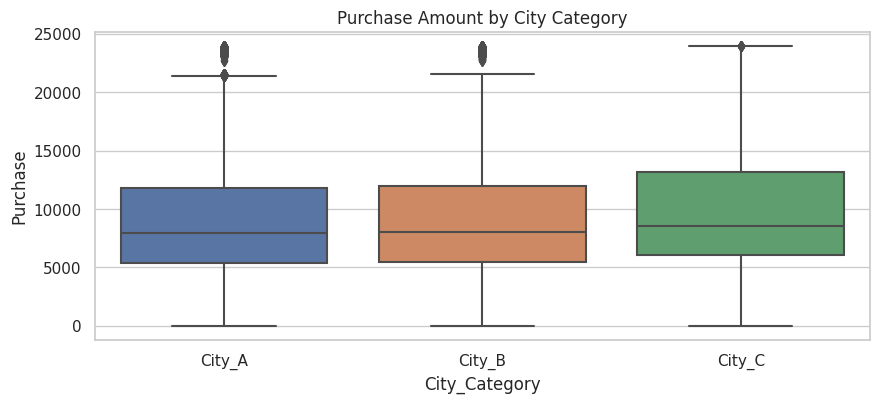

In [ ]:
# analysis the relationship between city category and purchase amount

# Filter out the columns that contain "Stay_In_Current_City_Years"
city_columns = [col for col in train_data.columns if col.startswith('City_') and 'Stay_In_Current_City_Years' not in col]

# Melt the dataset
train_data_city = train_data.melt(id_vars='Purchase', value_vars=city_columns, var_name='City_Category', value_name='Value')

# Filter out the rows where the value is 0 (0 means the city category is not the current city, 1 means the city category is the current city)
train_data_city = train_data_city[train_data_city['Value'] == 1]  # Filter out the rows where the value is 0

# Plot the boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='City_Category', y='Purchase', data=train_data_city)
plt.title('Purchase Amount by City Category')
plt.show()

In [ ]:
# descriptive statistics for city category
descriptive_stats_city = train_data[['City_A', 'City_B', 'City_C']].apply(
    lambda x: train_data['Purchase'][x==1].describe()
)

# ANOVA test for city category
anova_city = stats.f_oneway(
    train_data['Purchase'][train_data['City_A'] == 1],
    train_data['Purchase'][train_data['City_B'] == 1],
    train_data['Purchase'][train_data['City_C'] == 1]
)


# Kruskal-Wallis H-test for city category
kruskal_city = stats.kruskal(
    train_data['Purchase'][train_data['City_A'] == 1],
    train_data['Purchase'][train_data['City_B'] == 1],
    train_data['Purchase'][train_data['City_C'] == 1]
)

descriptive_stats_city, anova_city, kruskal_city


(              City_A         City_B         City_C
 count  147720.000000  231173.000000  171175.000000
 mean     8911.939216    9151.300563    9719.920993
 std      4892.115238    4955.496566    5189.465121
 min        12.000000      12.000000      12.000000
 25%      5403.000000    5460.000000    6031.500000
 50%      7931.000000    8005.000000    8585.000000
 75%     11786.000000   11986.000000   13197.000000
 max     23961.000000   23960.000000   23961.000000,
 F_onewayResult(statistic=1130.7459610102974, pvalue=0.0),
 KruskalResult(statistic=2303.7127322648357, pvalue=0.0))

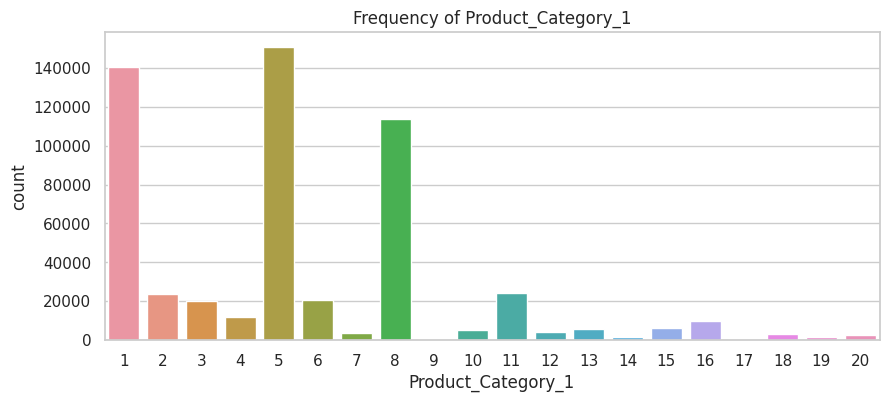

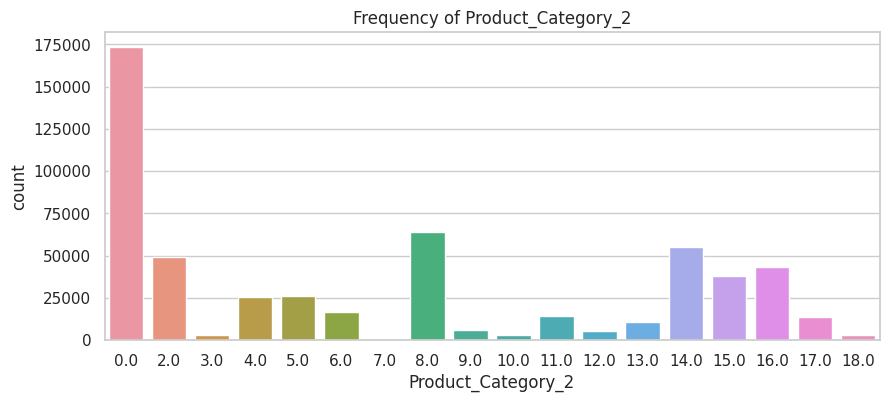

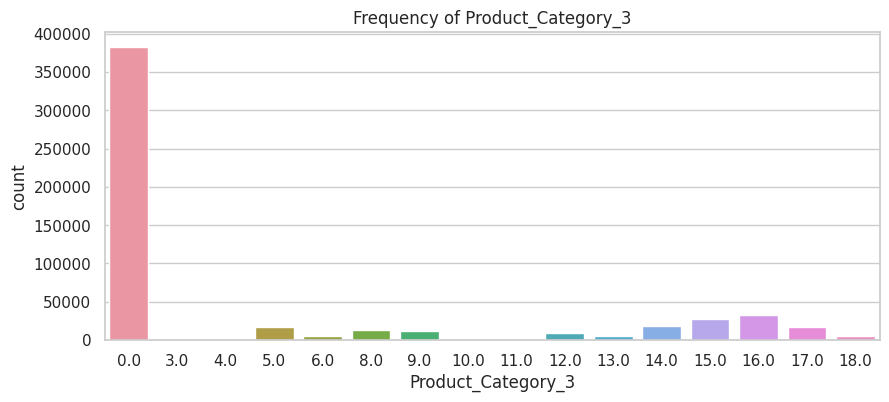

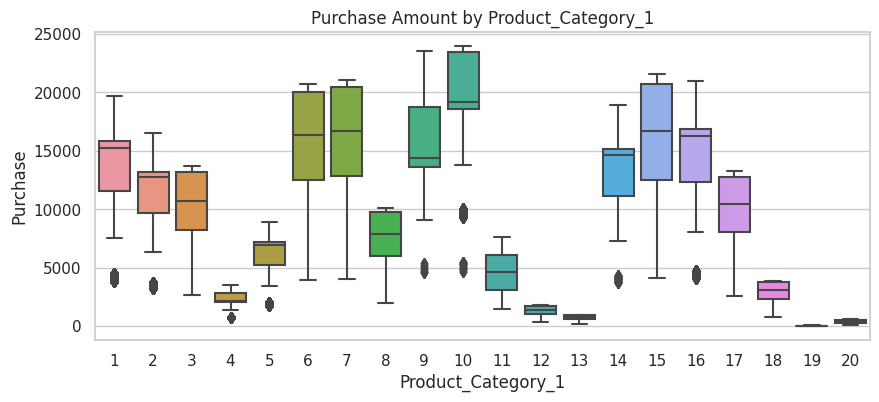

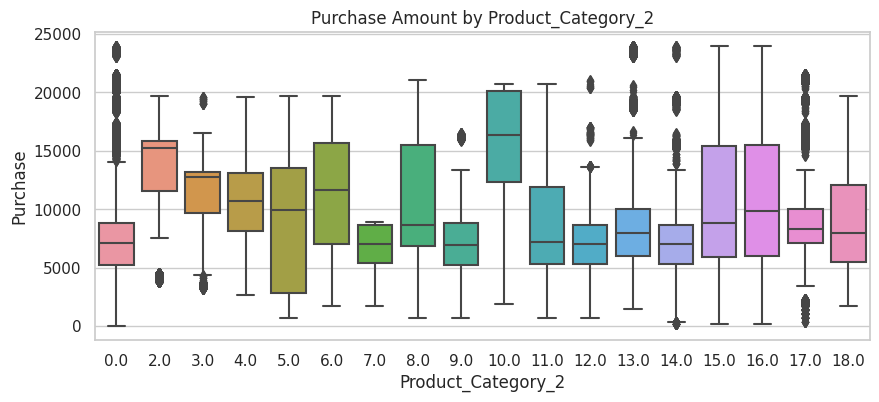

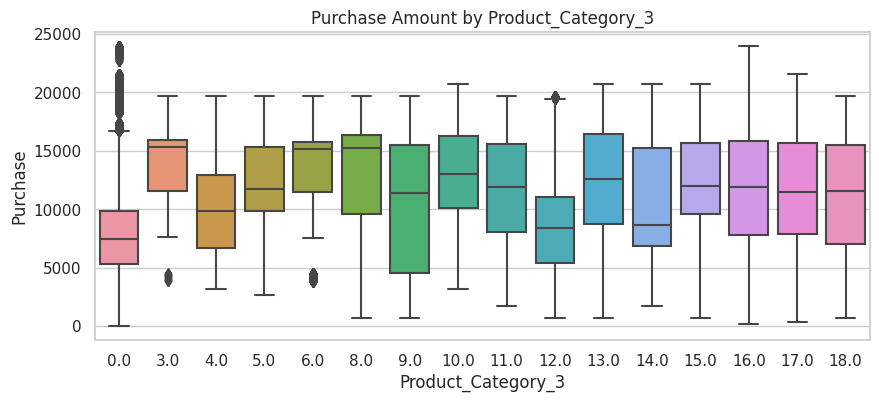

In [ ]:
# distribution of product category 1

for category in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=category, data=train_data)
    plt.title(f'Frequency of {category}')
    plt.show()

# relationship between product category 1 and purchase amount

for category in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=category, y='Purchase', data=train_data)
    plt.title(f'Purchase Amount by {category}')
    plt.show()


### From the descpritive stats result above, descriptive statistics show that the mean and median purchase amount for City_C are higher than the other two cities. ALso, anova test shows that the p-value is less than 0.05, which means the difference between these means is statistically significant and is unlikely to be caused by random factors. Kruskal-Wallis H-test also shows that there is a significant difference in purchase amount between different city categories


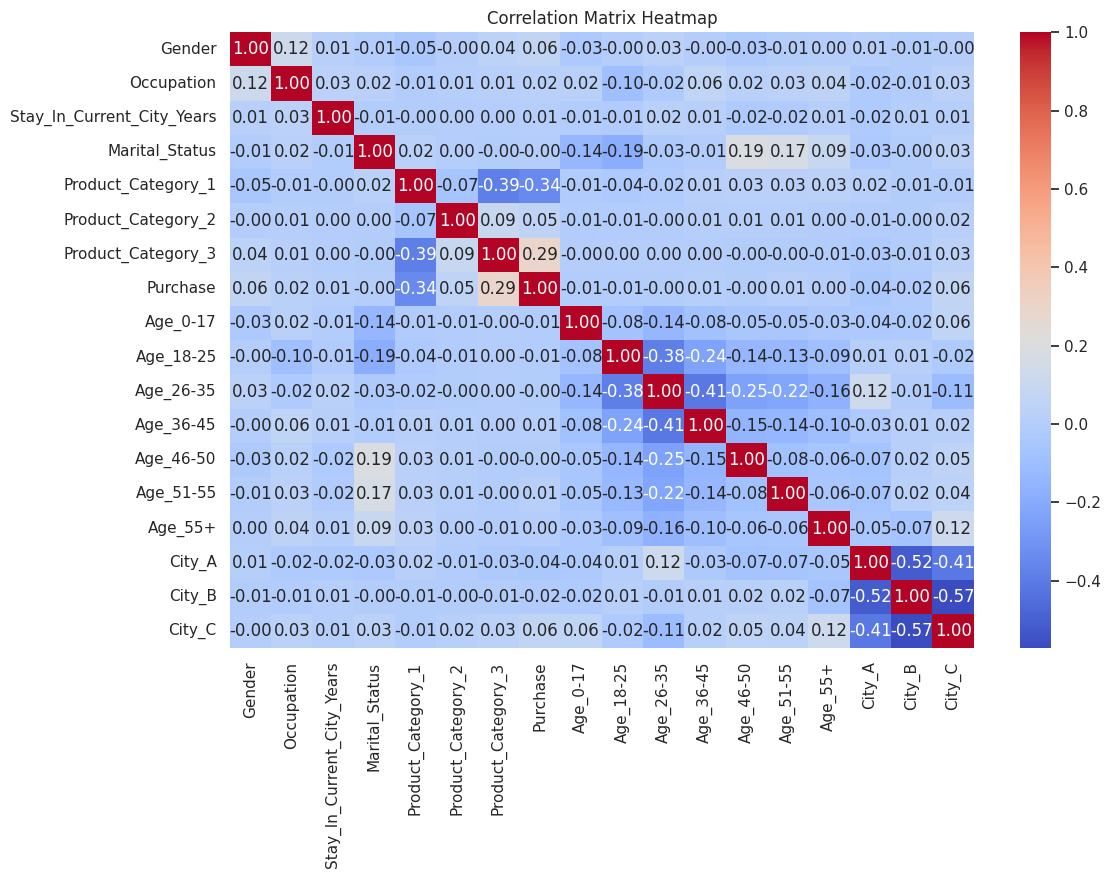

In [ ]:
# remove non-numeric columns (User_ID and Product_ID)
numeric_df = train_data.drop(columns=['User_ID', 'Product_ID'])

# make sure only numeric columns are included
numeric_df = numeric_df.select_dtypes(include=[np.number])

# calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()




### From now on, we can prepare our training dataset

In [ ]:
train_data_encoded.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,P00069042,10,0,3,0.0,0.0,8370,1,0,...,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,10,0,12,0.0,0.0,1422,1,0,...,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,10,0,12,14.0,0.0,1057,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,16,0,8,0.0,0.0,7969,0,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


# 删除不需要的列
X = train_data_encoded.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = train_data_encoded['Purchase']


# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# 拟合标准化器并转换训练数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 使用相同的标准化器来转换验证集数据
X_val_scaled = scaler.transform(X_val)



### We have 440054 training samples and 110014 test samples, each sample has 17 features. Now we can build our model

In [ ]:
# 3. 模型训练
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 4. 验证集上评估模型
val_predictions = model.predict(X_val_scaled)
val_rmse = sqrt(mean_squared_error(y_val, val_predictions))
print(f'Validation RMSE: {val_rmse}')

# 5. 测试集上的处理和评估

# 使用训练集的标准化参数来转换测试集
# test_features = test_data.drop(['User_ID', 'Product_ID'], axis=1)  # 确保这里不包括 'Purchase'
# test_features_scaled = scaler.transform(test_features)

# 进行预测
test_predictions = model.predict(test_data_scaled)

Validation RMSE: 3057.3259234996726


In [ ]:
import pandas as pd


test_predictions

# 假设test_data_original是包含原始User_ID和Product_ID的测试集的DataFrame
test_data_original = pd.read_csv('/content/test 2.csv')

# 创建一个DataFrame来保存您的预测和相应的ID
submission = pd.DataFrame({
    'User_ID': test_data_original['User_ID'],
    'Product_ID': test_data_original['Product_ID'],
    'Purchase': test_predictions
})

# 导出为CSV文件，不包含索引
submission.to_csv('submission.csv', index=False)
